## Run Policies

In [1]:
from policies import run_experiment

policies = [3]
exp_num = [1, 2, 3, 4]
run_time = 40_000

queue_logs = []

# NOTE: run_experiment returns queue_lengths_over_time, profit_per_customer, frac_over_30s, avg_queue_len

# Run experiments for policies
for i in range(len(policies)): 
    pol_results = []
    for j in range(len(exp_num)): 
        pol_results.append(run_experiment(policies[i], exp_num[j], run_time)[0])
    queue_logs.append(pol_results)


------------------- Policy 3, Results for experiment 1:----------------
Average profit per customer: 5.403473545696655
Fraction of customers waiting over 30s: 0.9299090248636457
ITERS: 184481
Average length of queue 1: 22.70918250999285
Average length of queue 2: 15.010996298553213
Average length of queue 3: 28.73674635279627
------------------- Policy 3, Results for experiment 2:----------------
Average profit per customer: 51.8625965917009
Fraction of customers waiting over 30s: 0.6757975833799756
ITERS: 182257
Average length of queue 1: 4.4834544189219425
Average length of queue 2: 2.4062146106372406
Average length of queue 3: 2.986509050980914
------------------- Policy 3, Results for experiment 3:----------------
Average profit per customer: 44.382541647506976
Fraction of customers waiting over 30s: 0.7514895190049579
ITERS: 183976
Average length of queue 1: 8.422098684824565
Average length of queue 2: 3.3392195628619348
Average length of queue 3: 3.9591985555252434
--------------

In [2]:
log0 = queue_logs[0][0]
print("len(log0) =", len(log0))
print("first few entries:", log0[:5])


len(log0) = 184481
first few entries: [(0.0, [0, 0, 0]), (0.789330887635103, [0, 0, 0]), (0.8512040887605288, [0, 0, 0]), (1.0909215550991327, [0, 0, 0]), (1.447525338215116, [0, 0, 0])]



Warm-up time = 0
  Policy 3:
    q0: mean=11.865, CI=(-0.6942721648884316, 24.424012087339836), rel_hw=105.851%
    q1: mean=6.730, CI=(-2.5154103037469655, 15.97607640938487), rel_hw=137.374%
    q2: mean=10.282, CI=(-9.716083145381475, 30.27917104916117), rel_hw=194.500%

Warm-up time = 100
  Policy 3:
    q0: mean=11.887, CI=(-0.701595327436161, 24.476029054611445), rel_hw=105.902%
    q1: mean=6.743, CI=(-2.5233986161097857, 16.010195081420605), rel_hw=137.420%
    q2: mean=10.301, CI=(-9.739177578109638, 30.342135227006892), rel_hw=194.542%

Warm-up time = 200
  Policy 3:
    q0: mean=11.906, CI=(-0.707607151477939, 24.51866753101065), rel_hw=105.944%
    q1: mean=6.756, CI=(-2.5346962306660163, 16.04584603305984), rel_hw=137.520%
    q2: mean=10.323, CI=(-9.76655172617893, 30.41206690126336), rel_hw=194.612%

Warm-up time = 300
  Policy 3:
    q0: mean=11.926, CI=(-0.719319045383255, 24.57189295688239), rel_hw=106.031%
    q1: mean=6.769, CI=(-2.5428930988637353, 16.080372088026

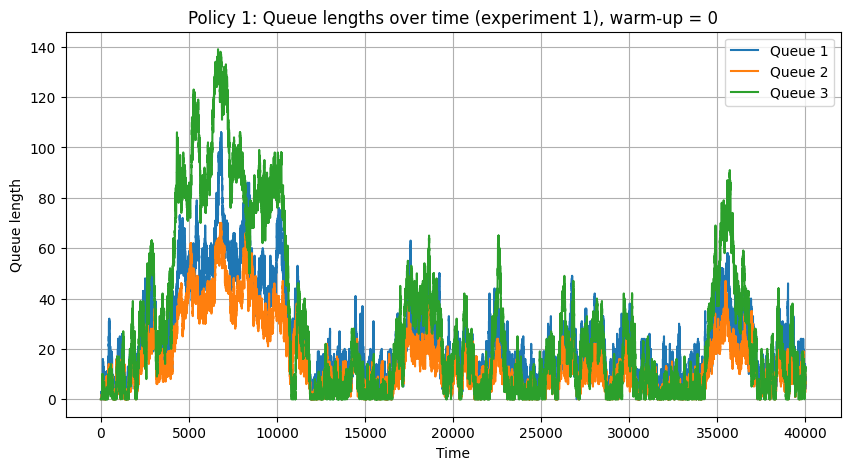

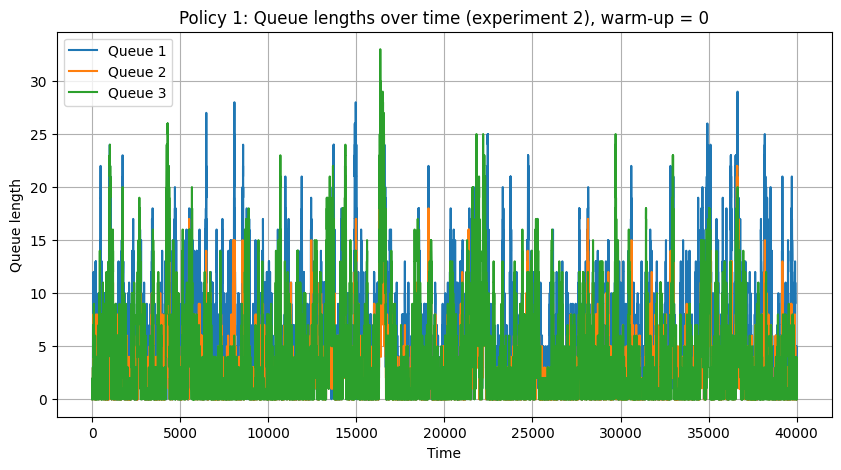

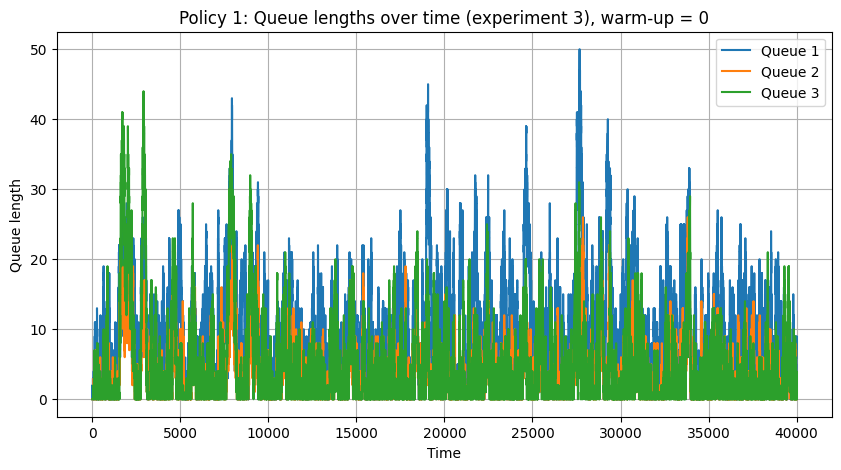

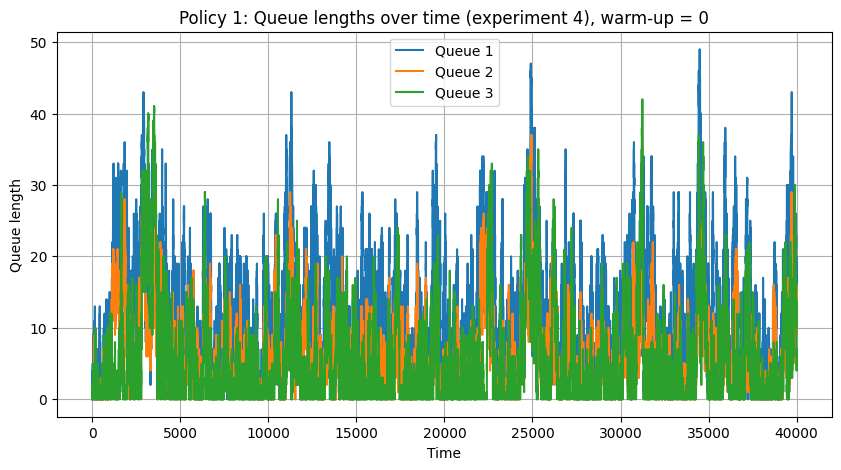

In [3]:
import matplotlib.pyplot as plt
from utils import ci_from_queue_logs, plot_queue_lengths

warmup_time_candidates = [0, 100, 200, 300, 400]

for w in warmup_time_candidates:
    res = ci_from_queue_logs(queue_logs, warmup_time=w)
    print(f"\nWarm-up time = {w}")
    for pol_idx, pol_res in res.items():
        print(f"  Policy {policies[pol_idx]}:")
        for q_name, stats in pol_res.items():
            print(
                f"    {q_name}: mean={stats['mean']:.3f}, "
                f"CI={stats['ci']}, "
                f"rel_hw={stats['rel_halfwidth']:.3%}"
            )

for i in range(len(policies)):
    for j in range(len(exp_num)):
        plot_queue_lengths(queue_logs[i][j], warmup_time=0, exp_num=j+1, policy_num=i+1)